In [514]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [515]:
initial_data = pd.read_csv("earthquake.csv")

In [516]:
print(initial_data.head())

                       time  latitude  longitude    depth  mag magType    nst  \
0  2024-11-12T14:31:59.659Z   -4.5205   152.4422   89.123  5.3     mww  126.0   
1  2024-11-12T13:48:50.344Z   36.3155   141.2801   38.636  4.5      mb   58.0   
2  2024-11-12T09:24:26.883Z    0.5833   126.1828   17.810  5.2     mww   81.0   
3  2024-11-12T08:30:35.144Z   27.3495    88.3392   10.000  4.4      mb   40.0   
4  2024-11-12T08:13:20.377Z   37.5859   135.4869  358.970  4.4      mb   97.0   

     gap   dmin   rms  ...                   updated  \
0   62.0  0.429  0.76  ...  2024-11-12T14:56:49.850Z   
1  137.0  2.487  0.53  ...  2024-11-12T17:19:14.040Z   
2   46.0  1.198  1.10  ...  2024-11-12T09:39:46.040Z   
3  145.0  2.753  0.83  ...  2024-11-12T14:45:37.462Z   
4   56.0  2.408  0.72  ...  2024-11-12T08:49:19.040Z   

                                  place        type horizontalError  \
0  27 km SE of Kokopo, Papua New Guinea  earthquake            7.91   
1               62 km E of Ōarai, 

In [517]:
timed_data= initial_data[['latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'dmin','time']]
print(timed_data.head())

   latitude  longitude    depth  mag magType    gap   dmin  \
0   -4.5205   152.4422   89.123  5.3     mww   62.0  0.429   
1   36.3155   141.2801   38.636  4.5      mb  137.0  2.487   
2    0.5833   126.1828   17.810  5.2     mww   46.0  1.198   
3   27.3495    88.3392   10.000  4.4      mb  145.0  2.753   
4   37.5859   135.4869  358.970  4.4      mb   56.0  2.408   

                       time  
0  2024-11-12T14:31:59.659Z  
1  2024-11-12T13:48:50.344Z  
2  2024-11-12T09:24:26.883Z  
3  2024-11-12T08:30:35.144Z  
4  2024-11-12T08:13:20.377Z  


In [518]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
timed_data['magType_num'] = label_encoder.fit_transform(timed_data['magType'])

print(timed_data.head())

   latitude  longitude    depth  mag magType    gap   dmin  \
0   -4.5205   152.4422   89.123  5.3     mww   62.0  0.429   
1   36.3155   141.2801   38.636  4.5      mb  137.0  2.487   
2    0.5833   126.1828   17.810  5.2     mww   46.0  1.198   
3   27.3495    88.3392   10.000  4.4      mb  145.0  2.753   
4   37.5859   135.4869  358.970  4.4      mb   56.0  2.408   

                       time  magType_num  
0  2024-11-12T14:31:59.659Z           10  
1  2024-11-12T13:48:50.344Z            1  
2  2024-11-12T09:24:26.883Z           10  
3  2024-11-12T08:30:35.144Z            1  
4  2024-11-12T08:13:20.377Z            1  


In [519]:
timed_data= timed_data.drop(['magType'], axis=1)
print(fdata.head())

   latitude  longitude    depth  mag    gap   dmin  magType_num
0   -4.5205   152.4422   89.123  5.3   62.0  0.429           10
1   36.3155   141.2801   38.636  4.5  137.0  2.487            1
2    0.5833   126.1828   17.810  5.2   46.0  1.198           10
3   27.3495    88.3392   10.000  4.4  145.0  2.753            1
4   37.5859   135.4869  358.970  4.4   56.0  2.408            1


In [520]:
timed_data.shape
timed_data = timed_data.drop_duplicates()

In [521]:
timed_data= timed_data.dropna()
df= timed_data[['latitude', 'longitude', 'depth', 'mag', 'magType_num', 'gap', 'dmin']]
df.shape

(581, 7)

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 761
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     581 non-null    float64
 1   longitude    581 non-null    float64
 2   depth        581 non-null    float64
 3   mag          581 non-null    float64
 4   magType_num  581 non-null    int64  
 5   gap          581 non-null    float64
 6   dmin         581 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 36.3 KB


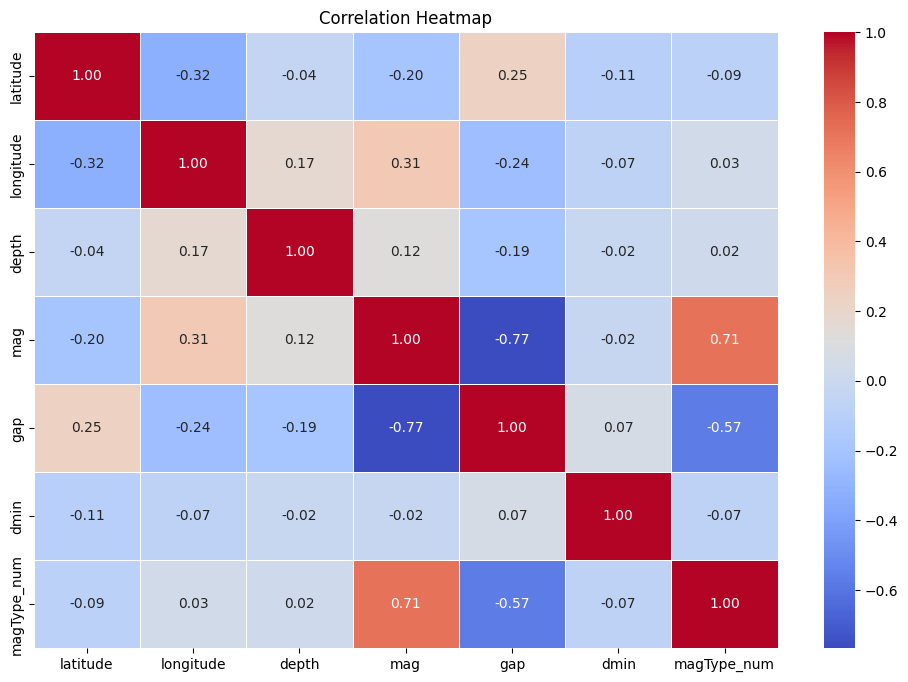

In [523]:
import seaborn as sns

numerical_columns = fdata.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = fdata[numerical_columns].corr()

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

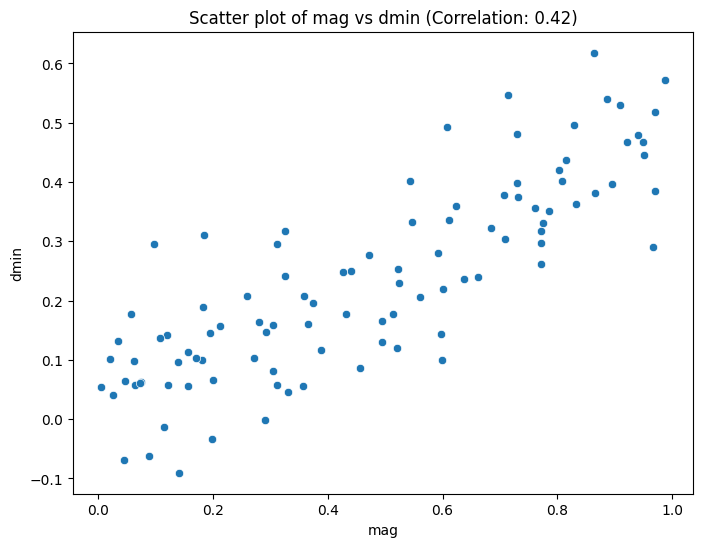

In [524]:

np.random.seed(42)
mag = np.random.rand(100)
dmin = 0.5 * mag + np.random.normal(0, 0.1, 100)

data = pd.DataFrame({'mag': mag, 'dmin': dmin})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='mag', y='dmin')

# Add title and labels
plt.title('Scatter plot of mag vs dmin (Correlation: 0.42)')
plt.xlabel('mag')
plt.ylabel('dmin')

# Show the plot
plt.show()


In [525]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [526]:
x= df[['latitude', 'longitude', 'depth', 'gap', 'dmin']]
y= df['mag']

In [527]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [528]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [529]:
y_testArr= np.array(y_test)

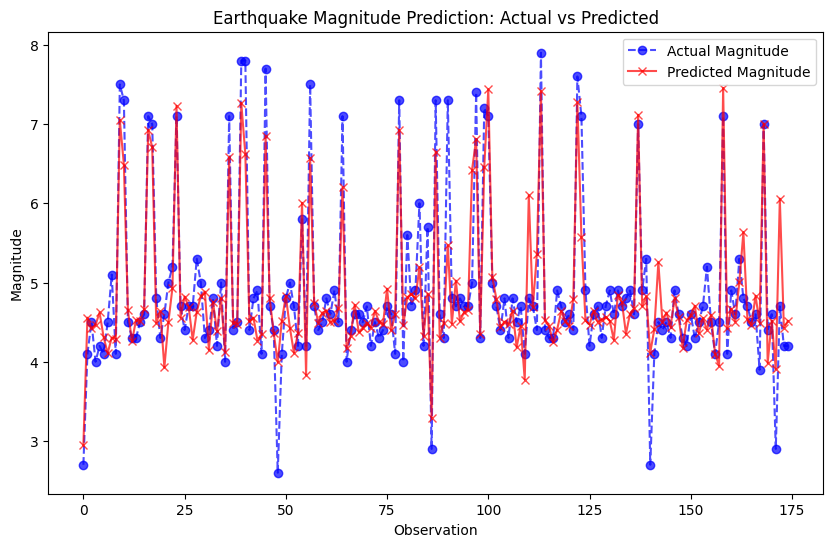

In [530]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_testArr, label='Actual Magnitude', marker='o', color='b', linestyle='--', alpha=0.7)
plt.plot(y_pred, label='Predicted Magnitude', marker='x', color='r', linestyle='-', alpha=0.7)

plt.xlabel('Observation')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Prediction: Actual vs Predicted')
plt.legend()

plt.show()


In [531]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse*100)
print("R^2 Score:", r2*100)


Mean Squared Error: 22.572230857142834
R^2 Score: 79.45543242957291


In [532]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define the bin edges (for example, 0-1, 1-2, ..., 9-10 for earthquake magnitude)
bins = np.arange(0, 10, 2)  # Bins of size 1 for magnitudes between 0 and 10
labels = np.digitize(y_test, bins)  # Assigning labels for the true values
y_pred_binned = np.digitize(y_pred, bins)  # Assigning labels for the predicted values

# Calculate accuracy (percentage of correct predictions in the correct bin)
accuracy = accuracy_score(labels, y_pred_binned)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9200


In [533]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


In [534]:
X = df.drop(columns=['mag'])  # Features
y = df['mag']  # Target variable (magnitude)

In [535]:
mag_values= np.array(y).reshape(-1, 1)
scaler_target = MinMaxScaler(feature_range=(0, 6))
scaled_mag_values = scaler_target.fit_transform(mag_values)

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, scaled_mag_values, test_size=0.3, random_state=42)

In [537]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [538]:
svm_model = SVR(kernel='rbf')

In [539]:
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
y_pred= y_pred.flatten()
original_mag_values = scaler_target.inverse_transform(y_pred.reshape(-1, 1))
original_mag_values= original_mag_values.flatten()
original_mag_values_test = scaler_target.inverse_transform(scaled_mag_values)
original_mag_values_test= original_mag_values_test.flatten()
print(original_mag_values)
print(y_pred)

[3.37364184 4.47135569 4.50029561 4.54002142 4.61282452 4.32756832
 4.15873228 4.61056883 4.21760168 6.90178362 5.95460876 4.57685728
 4.48417188 4.33812576 4.40852657 4.82776401 6.82592228 6.7708572
 4.42652564 4.46326854 3.99332193 4.51878167 5.93425789 7.05131069
 4.39306959 4.77356929 4.62367421 4.56759482 5.49743356 4.82702836
 4.68234175 4.12486614 4.66636696 4.29339692 4.71322367 4.16595497
 6.73164804 4.51213365 4.44835084 7.18956002 6.05863638 4.46070142
 4.47321805 4.36676888 4.48207122 5.96861252 4.63730994 4.43634217
 3.41549875 4.30350448 4.74984881 4.56024986 4.53860566 4.58725256
 6.55806512 4.22278708 5.87396744 4.66539257 4.52168992 4.43923186
 4.60775209 4.42830787 4.57517371 4.84202704 6.57318939 4.19137582
 4.31183588 4.55751694 4.26463999 4.35286905 4.52024268 4.32984206
 4.44391535 4.3791192  4.64308775 4.84593568 4.32261731 4.69441947
 7.0555683  4.36968082 5.76164061 4.67593186 4.70896284 5.74630651
 4.4969026  4.59091549 3.84098556 7.14234714 4.34555013 4.45344

In [540]:
mse = mean_squared_error(original_mag_values, y_test)
r2 = r2_score(original_mag_values, y_test)
print("Mean Squared Error:", mse*100)
print("R^2 Score:", r2*100)

Mean Squared Error: 532.8376666313214
R^2 Score: -655.1690257190022


In [541]:
bins = np.arange(0, 10, 2)
labels = np.digitize(original_mag_values, bins)
y_pred_binned = np.digitize(y_pred, bins)

accuracy = accuracy_score(labels, y_pred_binned)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.0000


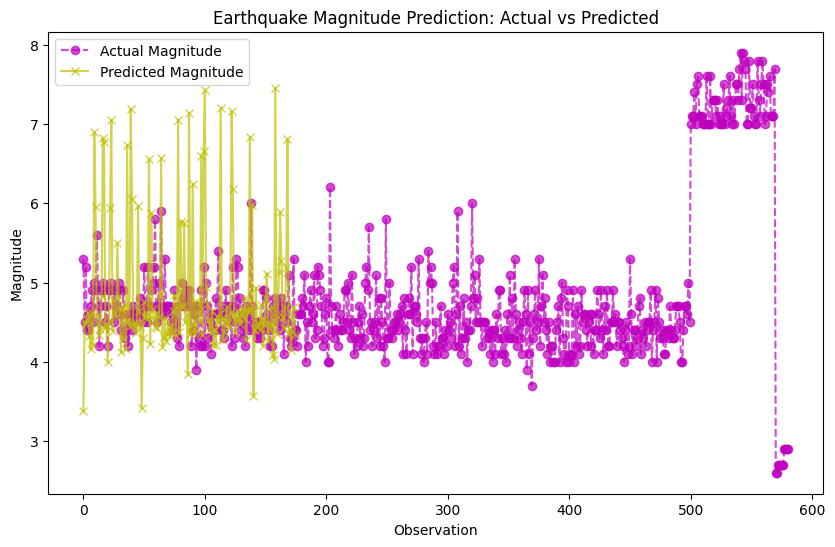

In [542]:
plt.figure(figsize=(10, 6))
plt.plot(original_mag_values_test, label='Actual Magnitude', marker='o', color='m', linestyle='--', alpha=0.7)
plt.plot(original_mag_values, label='Predicted Magnitude', marker='x', color='y', linestyle='-', alpha=0.7)
plt.xlabel('Observation')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Prediction: Actual vs Predicted')
plt.legend()
plt.show()


In [543]:
import xgboost as xgb


In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [545]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)

In [546]:
xg_reg.fit(X_train_scaled, y_train)
y_pred = xg_reg.predict(X_test_scaled)

In [547]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse*100)
print("R^2 Score:", r2*100)

Mean Squared Error: 17.39545966030056
R^2 Score: 86.1940796346821


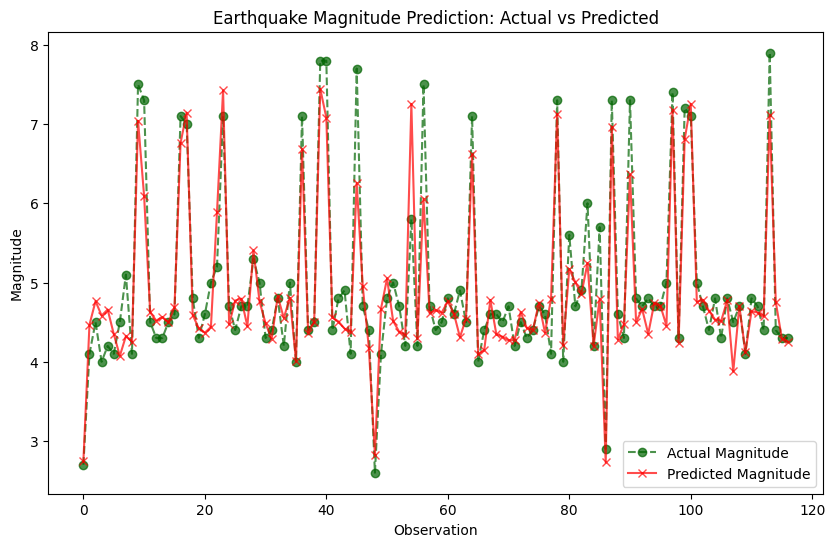

In [548]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Magnitude', marker='o', color='darkgreen', linestyle='--', alpha=0.7)
plt.plot(y_pred, label='Predicted Magnitude', marker='x', color='r', linestyle='-', alpha=0.7)
plt.xlabel('Observation')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Prediction: Actual vs Predicted')
plt.legend()
plt.show()

In [549]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
X_train ,X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 45)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [550]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse*100)
print("R^2 Score:", r2*100)

Mean Squared Error: 30.434566405792275
R^2 Score: 70.51748070068493


In [551]:
def predict_magnitude(latitude, longitude, depth, magType, gap, dmin ):  # Default depth if not specified
    # Create a feature array for the input (latitude, longitude, depth, and other features if needed)
    features = np.array([[latitude, longitude, depth, magType, gap, dmin]])

    predicted_magnitude = svm_model.predict(features)
    if predicted_magnitude < 5.0:
        magnitude_category = "Minor"
    elif 5.0 <= predicted_magnitude < 6.9:
        magnitude_category = "Moderate"
    else:
        magnitude_category = "Strong"

    return predicted_magnitude[0], magnitude_category



latitude = 28.777
longitude = 63.951
predicted_magnitude , magnitude_category = predict_magnitude(latitude, longitude, 68, 0, 25.3, 1.3)
print(f"Predicted earthquake magnitude at location ({latitude}, {longitude}): {predicted_magnitude}")
print(f"The earthquake is {magnitude_category}")

Predicted earthquake magnitude at location (28.777, 63.951): 2.86625390252658
The earthquake is Minor


In [552]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [553]:
features = df[['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin']]
mag_values= df[['mag']].values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(mag_values)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)


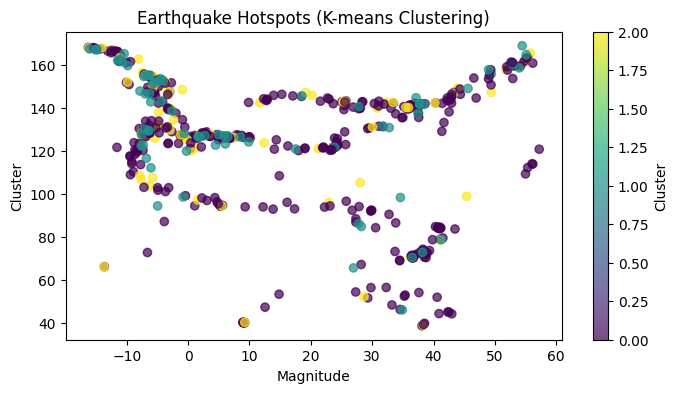

In [554]:
plt.figure(figsize=(8, 4))
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Earthquake Hotspots (K-means Clustering)')
plt.xlabel('Magnitude')
plt.ylabel('Cluster')
plt.show()


In [555]:
import folium

# Create a base map
map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add earthquake points
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue' if row['cluster'] == 0 else 'green' if row['cluster'] == 1 else 'red',
        fill=True,
        fill_color='blue' if row['cluster'] == 0 else 'green' if row['cluster'] == 1 else 'red',
        fill_opacity=0.6
    ).add_to(map)
#Blue: low-magnitude earthquakes
#Green: moderate-magnitude earthquakes
#Red: high-magnitude earthquakes

# Display the map
map


In [556]:
cluster_centers = kmeans.cluster_centers_
cluster_centers_original_scale = scaler.inverse_transform(cluster_centers)
print("Cluster Centers (Latitude, Longitude, Depth, Magnitude, Gap, Dmin):")
print(cluster_centers_original_scale)


Cluster Centers (Latitude, Longitude, Depth, Magnitude, Gap, Dmin):
[[4.35776081]
 [7.26619718]
 [5.04358974]]


In [557]:
pip install torch scikit-learn pandas matplotlib


In [558]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

In [559]:
X = df[['latitude', 'longitude', 'mag', 'dmin', 'gap', 'depth']].values
y = df['mag'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

train_tensor = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_tensor = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_tensor, batch_size=8, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=8)


In [560]:
import torch.nn as nn

class EarthquakeModel(nn.Module):
    def __init__(self):
        super(EarthquakeModel, self).__init__()
        self.fc1 = nn.Linear(6, 64)  # Input layer (6 features)
        self.fc2 = nn.Linear(64, 32)  # Hidden layer
        self.fc3 = nn.Linear(32, 1)   # Output layer (1 value for magnitude)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation at the output layer for regression
        return x

# Instantiate the model
model = EarthquakeModel()


In [561]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [562]:
# Training the model
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for batch in train_loader:
        X_batch, y_batch = batch
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs.view(-1), y_batch)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.1713
Epoch [20/100], Loss: 0.0156
Epoch [30/100], Loss: 0.0021
Epoch [40/100], Loss: 0.0037
Epoch [50/100], Loss: 0.0019
Epoch [60/100], Loss: 0.0028
Epoch [70/100], Loss: 0.0010
Epoch [80/100], Loss: 0.0033
Epoch [90/100], Loss: 0.0008
Epoch [100/100], Loss: 0.0062


In [563]:
# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = model(torch.tensor(X_test, dtype=torch.float32))
    predictions = predictions.view(-1).numpy()

    # Calculate performance (e.g., Mean Squared Error on the test set)
    mse = ((predictions - y_test) ** 2).mean()
    print(f'Mean Squared Error: {mse:.4f}')
    ss_total = ((y_test - np.mean(y_test)) ** 2).sum()  # Total sum of squares
    ss_residual = ((y_test - predictions) ** 2).sum()  # Residual sum of squares
    r_squared = 1 - (ss_residual / ss_total)
    print(f'R-squared: {r_squared:.4f}')


Mean Squared Error: 0.0078
R-squared: 0.9938


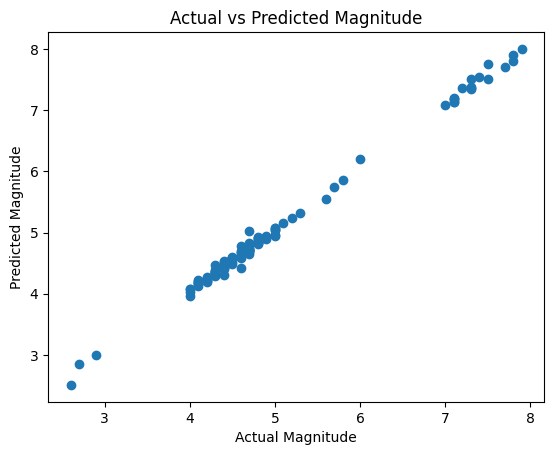

In [564]:
import matplotlib.pyplot as plt

# Plot actual vs predicted magnitudes
plt.scatter(y_test, predictions)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Magnitude')
plt.show()


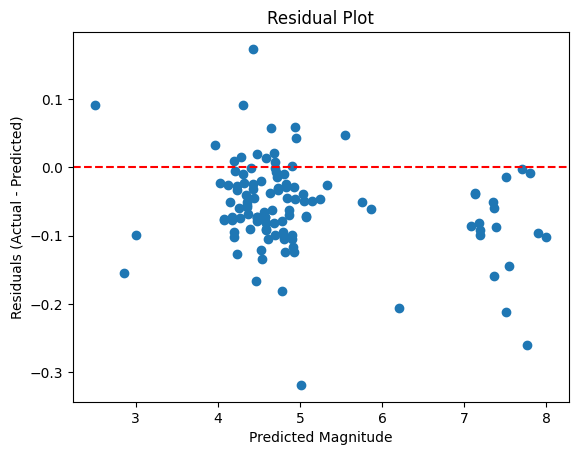

In [565]:
residuals = y_test - predictions

# Plot residuals
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Zero error line
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

In [566]:
import pandas as pd

# Extracting relevant columns from the initial data
dfDate = pd.DataFrame(initial_data[['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'dmin']])

# Convert 'time' column to datetime
dfDate['datetime'] = pd.to_datetime(initial_data['time'])

# Extract date, month, year, and optionally time
dfDate['date'] = dfDate['datetime'].dt.strftime('%Y-%m-%d')  # Keeps date as 'YYYY-MM-DD'
dfDate['month'] = dfDate['datetime'].dt.month
dfDate['year'] = dfDate['datetime'].dt.year
dfDate['time_of_day'] = dfDate['datetime'].dt.strftime('%H:%M:%S')  # Extracts time

# Drop the original timestamp column if not needed
dfDate.drop(columns=['time', 'datetime'], inplace=True)

# Print the final DataFrame
print(dfDate)


     latitude  longitude    depth  mag magType    gap   dmin        date  \
0     -4.5205   152.4422   89.123  5.3     mww   62.0  0.429  2024-11-12   
1     36.3155   141.2801   38.636  4.5      mb  137.0  2.487  2024-11-12   
2      0.5833   126.1828   17.810  5.2     mww   46.0  1.198  2024-11-12   
3     27.3495    88.3392   10.000  4.4      mb  145.0  2.753  2024-11-12   
4     37.5859   135.4869  358.970  4.4      mb   56.0  2.408  2024-11-12   
..        ...        ...      ...  ...     ...    ...    ...         ...   
796   46.9310   142.5520   10.000  3.0       m  172.6    NaN  2006-12-27   
797   34.0870   139.4870   10.000  3.0       m  208.7    NaN  2006-12-26   
798   39.2810    41.2080   12.000  3.0      md  226.2    NaN  2007-01-14   
799   34.0730   139.4100   10.000  3.0       m  207.3    NaN  2006-12-26   
800   34.3180   137.2690   35.000  3.0       m  164.6    NaN  2006-11-02   

     month  year time_of_day  
0       11  2024    14:31:59  
1       11  2024    13:48

In [567]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

features = ['latitude', 'longitude', 'dmin', 'gap', 'depth']
target = 'mag'

# Prepare the feature and target arrays
X = df[features].values
y = df[target].values

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [568]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model=64, nhead=4, num_layers=2):
        super(TransformerModel, self).__init__()

        # Linear transformation for input features
        self.embedding = nn.Linear(input_size, d_model)

        # Transformer encoder layer
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )

        # Final output layer
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        # Adding a dummy sequence dimension for Transformer
        x = x.unsqueeze(1)  # Shape: (batch_size, seq_len=1, input_size)

        # Apply the embedding to the input features
        x = self.embedding(x)

        # Apply Transformer encoder
        x = self.transformer(x)

        # Take the output of the last sequence element
        x = x[:, -1, :]  # Shape: (batch_size, d_model)

        # Final prediction layer
        x = self.fc(x)

        return x

# Instantiate the model
model = TransformerModel(input_size=len(features), output_size=1, d_model=64, nhead=4, num_layers=2)

# Print model architecture
print(model)


TransformerModel(
  (embedding): Linear(in_features=5, out_features=64, bias=True)
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


Epoch [10/100], Loss: 0.9796
Epoch [20/100], Loss: 0.9302
Epoch [30/100], Loss: 0.9211
Epoch [40/100], Loss: 0.9216
Epoch [50/100], Loss: 0.8895
Epoch [60/100], Loss: 0.7831
Epoch [70/100], Loss: 0.6677
Epoch [80/100], Loss: 0.5509
Epoch [90/100], Loss: 0.4247
Epoch [100/100], Loss: 0.3686


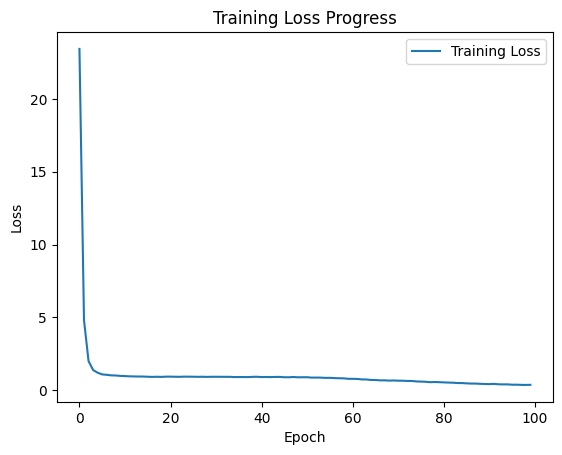

In [569]:
# Set up the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    optimizer.zero_grad()  # Zero the gradients
    predictions = model(X_train_tensor)  # Forward pass

    loss = criterion(predictions, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagate gradients
    optimizer.step()  # Update weights

    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Progress')
plt.legend()
plt.show()


Mean Squared Error on Test Data: 0.7430
R-squared: -136.0808


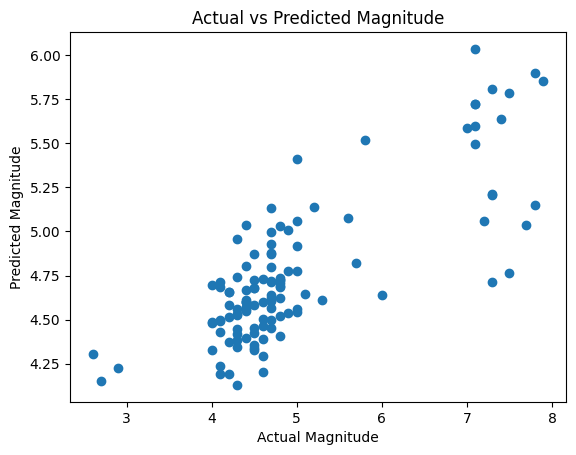

In [570]:
# Evaluate the model on the test data
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # No need to compute gradients during evaluation
    test_predictions = model(X_test_tensor)

# Convert predictions to numpy array
test_predictions = test_predictions.numpy()

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predictions)
print(f"Mean Squared Error on Test Data: {mse:.4f}")
ss_total = ((y_test - np.mean(y_test)) ** 2).sum()  # Total sum of squares
ss_residual = ((y_test - test_predictions) ** 2).sum()  # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)
print(f'R-squared: {r_squared:.4f}')

# Plot actual vs predicted magnitudes
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Magnitude')
plt.show()

# **LSTM**

In [571]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim


In [572]:
df = pd.DataFrame(timed_data[['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin', 'time']])
df['datetime'] = pd.to_datetime(initial_data['time'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.drop(columns=['time', 'datetime'], inplace=True)

In [573]:
features = ['latitude', 'longitude', 'depth', 'gap', 'dmin']
target = 'mag'

# Scale features and target
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + [target]])

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=features + [target])


In [574]:
def create_sequences(data, feature_columns, target_column, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = df[feature_columns].iloc[i:i + seq_length].values  # Only use feature columns
        label = df[target_column].iloc[i + seq_length]  # Use the target column for labels
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


In [575]:
seq_length = 10  # Number of previous timesteps to consider
X, y = create_sequences(scaled_df, feature_columns=features, target_column=target, seq_length=seq_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [576]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [577]:
class EarthquakeLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(EarthquakeLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM outputs
        out = self.fc(out[:, -1, :])  # Fully connected layer on the last time step
        return out


In [578]:
input_size = len(features)
hidden_size = 128  # Increased hidden size
num_layers = 3  # Increased number of layers
output_size = 1


model = EarthquakeLSTM(input_size, hidden_size, num_layers, output_size)


In [579]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)


In [580]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()


    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 17.5047
Epoch [20/100], Loss: 1.7041
Epoch [30/100], Loss: 1.1107
Epoch [40/100], Loss: 0.9400
Epoch [50/100], Loss: 0.8903
Epoch [60/100], Loss: 0.7728
Epoch [70/100], Loss: 0.5059
Epoch [80/100], Loss: 0.3128
Epoch [90/100], Loss: 0.2383
Epoch [100/100], Loss: 0.2191


In [587]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    y_test_numpy = y_test_tensor.numpy()
    predictions_numpy = predictions.numpy()

    # Calculate R-squared
    ss_total = ((y_test_numpy - np.mean(y_test_numpy)) ** 2).sum()  # Total sum of squares
    ss_residual = ((y_test_numpy - predictions_numpy) ** 2).sum()  # Residual sum of squares
    r_squared = 1 - (ss_residual / ss_total)
    print(f'R-squared: {r_squared:.4f}')


Test Loss: 0.1984
R-squared: 0.8517


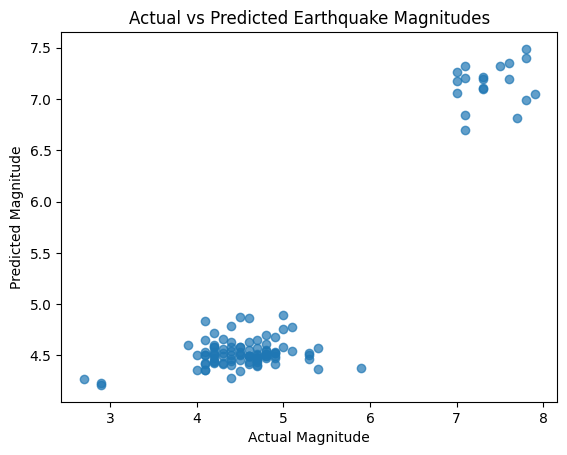

In [582]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions.numpy(), alpha=0.7)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Earthquake Magnitudes')
plt.show()


In [583]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming predictions and y_test are in the correct format
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1983931027312274
Root Mean Squared Error: 0.44541340654635375
